In [1]:
from empiricaldist import Pmf

## The Cookie Problem Revisited

Suppose there are two bowls of cookies. 

- Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. 
- Bowl 2 contains 20 vanilla cookies and 20 chocolate cookies.

In [9]:
prior = Pmf.from_seq(['Bow 1', 'Bow2'])
likelihood = [30/40, 20/40]
posterior = prior * likelihood
posterior

,probs
Bow 1,0.375
Bow2,0.250


In [10]:
posterior.normalize()

np.float64(0.625)

In [8]:
posterior

,probs
Bow 1,0.6
Bow2,0.4


In [12]:
posterior('Bow 1')

np.float64(0.6)

In [13]:
posterior *= likelihood
posterior.normalize()
posterior

,probs
Bow 1,0.692308
Bow2,0.307692


In [14]:
likelihood_chocolate = [0.25, 0.5]
posterior *= likelihood_chocolate
posterior.normalize()
posterior

,probs
Bow 1,0.529412
Bow2,0.470588


## 101 Bowls
Next let’s solve a Cookie Problem with 101 bowls: 
- Bowl 0 contains 0% vanilla cookies, 
- Bowl 1 contains 1% vanilla cookies, 
- Bowl 2 contains 2% vanilla cookies, and so on, up to 
- Bowl 99 contains 99% vanilla cookies, and 
- Bowl 100 contains all vanilla cookies.

In [15]:
import numpy as np

In [17]:
hypos = np.arange(101)
prior = Pmf(1, hypos)
prior.normalize()
prior.head()

,probs
0,0.009901
1,0.009901
2,0.009901


In [22]:
likehood_vanilla = hypos / 100
posterior1 = prior * likehood_vanilla
posterior1.normalize()
posterior1

,probs
0,0.000000
1,0.000198
2,0.000396
3,0.000594
4,0.000792
...,...
96,0.019010
97,0.019208
98,0.019406
99,0.019604


In [24]:
from utils import decorate
def decorate_bowls(title):
    decorate(xlabel='Bowl #', ylabel='PMF', title=title)

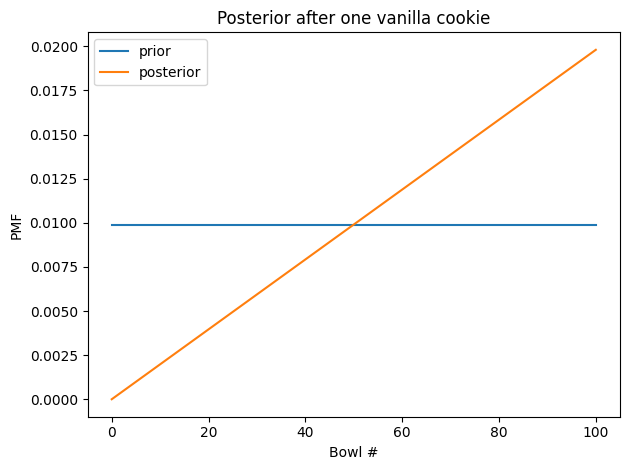

In [25]:
prior.plot(label='prior')
posterior1.plot(label='posterior')
decorate_bowls('Posterior after one vanilla cookie')

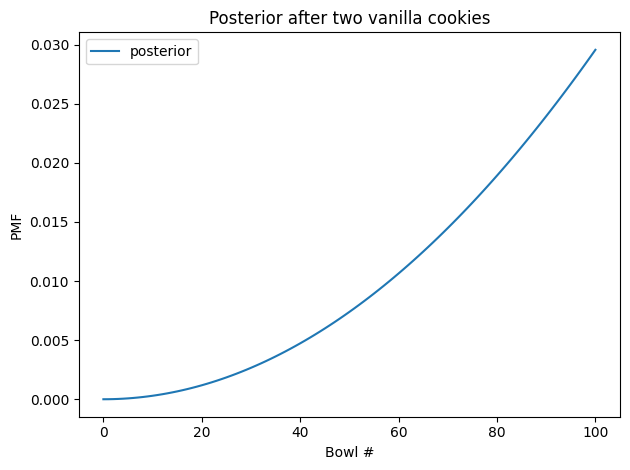

In [26]:
posterior2 = posterior1 * likehood_vanilla
posterior2.normalize()
posterior2.plot(label='posterior')
decorate_bowls('Posterior after two vanilla cookies')

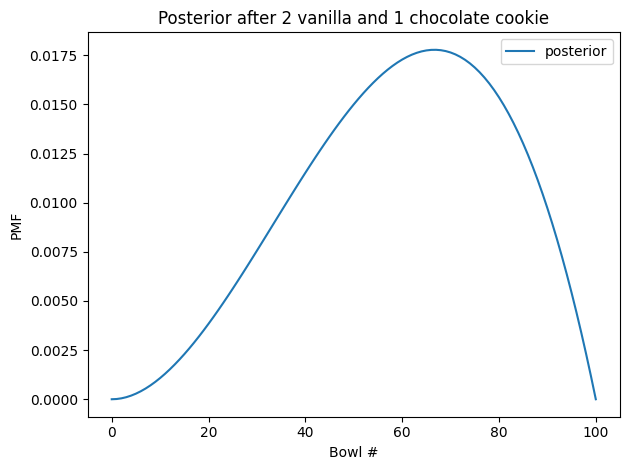

In [28]:
likelihood_chocolate = 1 - likehood_vanilla
posterior3 = posterior2 * likelihood_chocolate
posterior3.normalize()
posterior3.plot(label='posterior')
decorate_bowls('Posterior after 2 vanilla and 1 chocolate cookie')

In [32]:
posterior3.idxmax(), posterior3.max_prob(), posterior3.max(), posterior3(67)

(np.int64(67),
 np.int64(67),
 np.float64(0.017778217821782176),
 np.float64(0.017778217821782176))

### TheDice Problem

Suppose I have a box with a 6-sided die, an 8-sided die, and a 12-sided die. I choose one of the dice at random, roll it, and report that the outcome is a 1. What is the probability that I chose the 6-sided die?

In [36]:
hypos = [6,8,12]
prior = Pmf(1/3, hypos)
likelihood = [1/6, 1/8, 1/12]
posterior = prior * likelihood
posterior.normalize()
posterior

,probs
6,0.444444
8,0.333333
12,0.222222


In [37]:
prior.qs, prior.ps

(array([ 6,  8, 12]), array([0.33333333, 0.33333333, 0.33333333]))

In [39]:
hypos = prior.qs
likelihood = 1 / hypos
hypos, likelihood

(array([ 6,  8, 12]), array([0.16666667, 0.125     , 0.08333333]))

In [45]:
def update_dice(pmf, data):
    hypos = pmf.qs
    likelihood = 1 / hypos
    impossible = data > hypos
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

In [46]:
pmf = prior.copy()
pmf

,probs
6,0.333333
8,0.333333
12,0.333333


In [47]:
update_dice(pmf, 1)
update_dice(pmf, 7)
pmf

,probs
6,0.000000
8,0.692308
12,0.307692


## Exercise 3-1. 

Suppose I have a box with a 6-sided die, an 8-sided die, and a 12-sided die. I choose one of the dice at random, roll it four times, and get 1, 3, 5, and 7. What is the proba‐ bility that I chose the 8-sided die? You can use the update_dice function or do the update yourself.

In [50]:
pmf = prior.copy()
for data in [1,3,5,7]:
    update_dice(pmf, data)
pmf

,probs
6,0.000000
8,0.835052
12,0.164948


## Exercise 3-2. 

In the previous version of the Dice Problem, the prior probabilities are the same because the box contains one of each die. But suppose the box contains 1 die that is 4- sided, 2 dice that are 6-sided, 3 dice that are 8-sided, 4 dice that are 12-sided, and 5 dice that are 20-sided. I choose a die, roll it, and get a 7. What is the probability that I chose an 8-sided die? Hint: To make the prior distribution, call Pmf with two parameters.

In [57]:
prior_ex2 = Pmf([1, 2, 3, 4, 5], [4, 6, 8, 12, 20])
# prior_ex2.normalize()
prior_ex2

,probs
4,1
6,2
8,3
12,4
20,5


In [58]:
posterior_ex2 = prior_ex2.copy()
update_dice(posterior_ex2, 7)
posterior_ex2

,probs
4,0.000000
6,0.000000
8,0.391304
12,0.347826
20,0.260870


## Exercise 3-3. 

Suppose I have two sock drawers. One contains equal numbers of black and white socks. The other contains equal numbers of red, green, and blue socks. Suppose I choose a drawer at random, choose two socks at random, and I tell you that I got a matching pair. What is the probability that the socks are white? For simplicity, let’s assume that there are so many socks in both drawers that removing one sock makes a negligible change to the proportions.

In [61]:
# drawer 1: BB, WW, BW, WB, probality of pair: 1/2
# drawer 2: RR, GG, BB, RG, RB, GR, GB, BR, BG, probality of pair: 1/3
pmf_ex3 = Pmf(1/2, ['Drawer 1', 'Drawer 2'])
likelihood_ex3 = [1/2, 1/3]
posterior_ex3 = pmf_ex3 * likelihood_ex3
posterior_ex3.normalize()
posterior_ex3

,probs
Drawer 1,0.6
Drawer 2,0.4


## Exercise 3-4. 

Here’s a problem from Bayesian Data Analysis: Elvis Presley had a twin brother (who died at birth). What is the probability that Elvis was an identical twin? 

Hint: In 1935, about 2/3 of twins were fraternal and 1/3 were identical.

In [63]:
pmf_ex4 = Pmf([2/3, 1/3],['fraternal', 'identical'])
likelihood_ex4 = [1/2, 1]
posterior_ex4 = pmf_ex4 * likelihood_ex4
posterior_ex4.normalize()
posterior_ex4

,probs
fraternal,0.5
identical,0.5
